# OSEMN Exercises

In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import numpy.random as npr
npr.seed(2089577)

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [59]:
n_num = 500
with open('simple_data.txt', 'w') as sim_data:
    for i in np.arange(n_num - 1):
        sim_data.write(str(npr.randn()))
        sim_data.write('\n')

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [60]:
with open('data.txt', 'w') as data_txt:
    data_txt.write(str(npr.randn(5,5)))

3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [61]:
with open('data.txt', 'r') as data_txt:
    with open('data.csv', 'w') as data_csv:    
        for line in data_txt:
            curr_line = line.split()
            for x in curr_line:
                x = x.replace('[', '')
                x = x.replace(']', '')
                x = x.replace(',', '')
                if x != '':
                    data_csv.write(x + ',')
            data_csv.write('\n')

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [62]:
with open('credit_card.dat') as credit_card:
    credit_card_data = credit_card.read()
    rows = credit_card_data.split()
    credit_card_numbers = np.chararray((len(rows), int((len(rows[0]) - 4) / 6)))
    for (k,x) in enumerate(rows):
        prev_i = 0
        for i in np.arange(5, len(x) - 4, 6):
            number = chr(int(x[prev_i:i+1], 2))
            if number != ' ':
                number = int(number)
            credit_card_numbers[k, int((i+1) / 6) - 1] = number
            prev_i = i + 1
    print(credit_card_numbers)


[[b'7' b'6' b'4' b'8' '' b'5' b'6' b'7' b'3' '' b'3' b'7' b'7' b'5' ''
  b'2' b'2' b'7' b'1']
 [b'3' b'2' b'5' b'7' '' b'8' b'2' b'4' b'7' '' b'3' b'3' b'5' b'4' ''
  b'2' b'2' b'6' b'6']
 [b'2' b'7' b'2' b'2' '' b'0' b'0' b'0' b'1' '' b'4' b'0' b'1' b'1' ''
  b'6' b'6' b'5' b'2']
 [b'0' b'6' b'6' b'1' '' b'3' b'0' b'6' b'3' '' b'3' b'7' b'4' b'2' ''
  b'3' b'1' b'5' b'0']
 [b'0' b'4' b'3' b'2' '' b'1' b'6' b'0' b'8' '' b'1' b'4' b'6' b'2' ''
  b'4' b'7' b'4' b'2']
 [b'5' b'8' b'2' b'7' '' b'2' b'0' b'2' b'7' '' b'8' b'7' b'8' b'5' ''
  b'7' b'3' b'0' b'3']
 [b'5' b'7' b'7' b'4' '' b'8' b'5' b'2' b'8' '' b'2' b'0' b'8' b'7' ''
  b'1' b'1' b'1' b'7']
 [b'8' b'1' b'4' b'0' '' b'1' b'2' b'1' b'0' '' b'6' b'3' b'5' b'2' ''
  b'2' b'8' b'4' b'5']
 [b'5' b'7' b'6' b'4' '' b'1' b'1' b'3' b'3' '' b'7' b'3' b'0' b'1' ''
  b'7' b'1' b'0' b'0']
 [b'6' b'4' b'5' b'6' '' b'1' b'7' b'3' b'7' '' b'4' b'1' b'2' b'6' ''
  b'6' b'7' b'2' b'6']
 [b'1' b'2' b'2' b'8' '' b'8' b'6' b'3' b'1' '' b'7' b'3' b'

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [63]:
import json
import csv

with open('user_data.json', 'r') as json_file:
    data_json = json.load(json_file)
    print(data_json[0:2])
    with open('user_data.csv', 'w') as csv_file:
        csv_writer = csv.writer(csv_file)
        c = 0
        for user in data_json:
            if c == 0:
                header = user.keys()
                csv_writer.writerow(header)
                csv_writer.writerow(user.values())
                c += 1
            else:
                csv_writer.writerow(user.values())

[{'ID': '1', 'JobTitle': 'Project Manager', 'EmailAddress': 'Remy_Crawford1065@typill.biz', 'FirstNameLastName': 'Remy Crawford', 'CreditCard': '6205-7258-7671-0612', 'CreditCardType': 'Capital One'}, {'ID': '2', 'JobTitle': 'Investment  Advisor', 'EmailAddress': 'Clint_Thorpe5003@bulaffy.com', 'FirstNameLastName': 'Clint Thorpe', 'CreditCard': '7083-8766-0251-2345', 'CreditCardType': 'American Express'}]


6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=0](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


<AxesSubplot:ylabel='Frequency'>

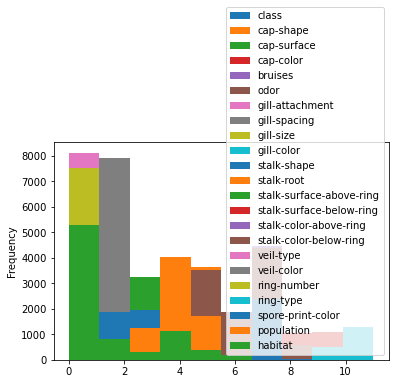

In [64]:
import pandas as pd
%matplotlib inline

url = "https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=0"
pd_data = pd.read_csv('mushrooms_categorized.csv')

pd_data.plot.hist('class')

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

<AxesSubplot:xlabel='features_2', ylabel='features_3'>

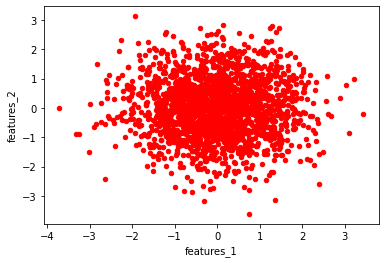

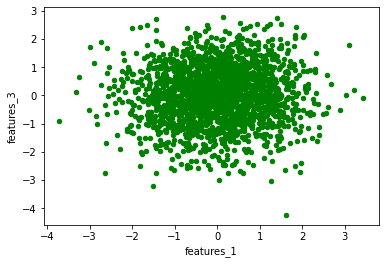

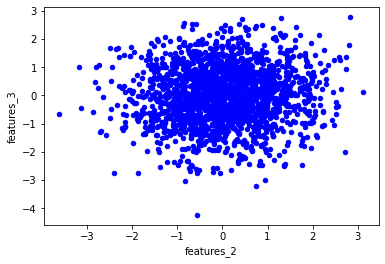

In [65]:
pd_data = pd.read_csv('regression_generated.csv')
pd_data

pd_data.plot.scatter('features_1', 'features_2', color='r')
pd_data.plot.scatter('features_1', 'features_3', color='g')
pd_data.plot.scatter('features_2', 'features_3', color='b')


8\. Load the same file of point 6, and convert the file to json with Pandas.

In [67]:
pd_data = pd.read_csv('mushrooms_categorized.csv')
pd_data.to_json('mushrooms_categorized.json')
pd_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [68]:

pd_data_json = pd.read_json('mushrooms_categorized.json')
pd_data_json

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2
